<a href="https://colab.research.google.com/github/Imran-co/Imran/blob/main/Project_Test_with_Output_using_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
!pip install joblib # Directly import joblib
import cv2
import numpy as np
from scipy import misc
#from sklearn.externals import joblib # Remove this line
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import pandas as pd


In [ ]:
!python --version

Python 3.11.11


In [ ]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /content


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload files


Saving eight.png to eight (1).png
Saving five.png to five.png
Saving four.png to four.png
Saving nine.png to nine.png
Saving one.png to one.png
Saving seven.png to seven.png
Saving six.png to six.png
Saving three.png to three.png


In [ ]:
import os

images = [ 'one','three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

for image in images:
    filep = os.path.join('', f'{image}.png')

    # Debugging to check if the file exists
    if os.path.exists(filep):
        print(f"Found file: {filep}")
    else:
        print(f"File not found: {filep}")

Found file: one.png
Found file: three.png
Found file: four.png
Found file: five.png
Found file: six.png
Found file: seven.png
Found file: eight.png
Found file: nine.png


Found file: one.png


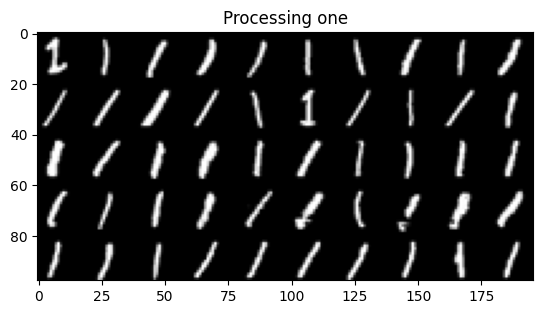

Number of contours found: 50
Processed label 0 with 50 samples.
Found file: three.png


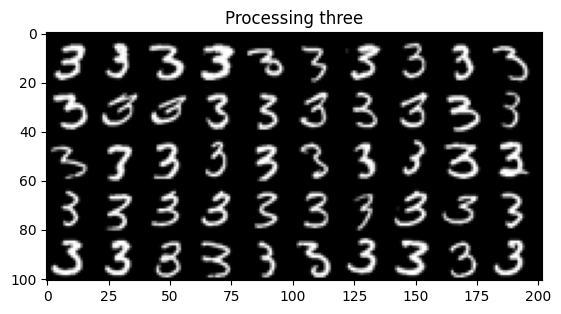

Number of contours found: 50
Processed label 1 with 100 samples.
Found file: four.png


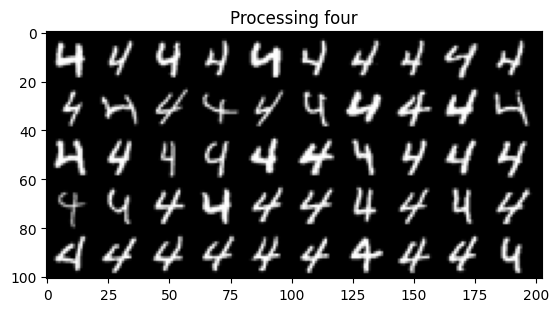

Number of contours found: 50
Processed label 2 with 150 samples.
Found file: five.png


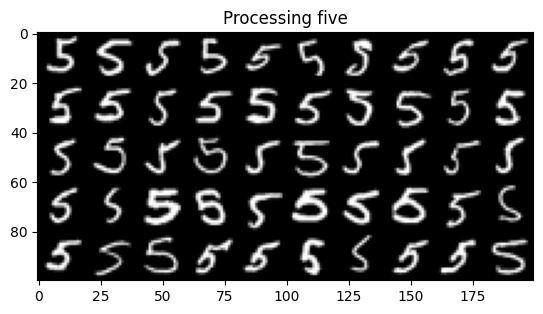

Number of contours found: 50
Processed label 3 with 200 samples.
Found file: six.png


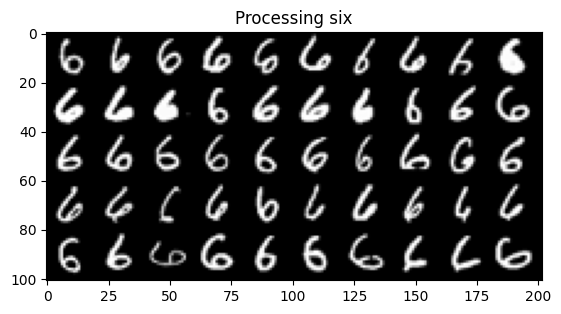

Number of contours found: 50
Processed label 4 with 250 samples.
Found file: seven.png


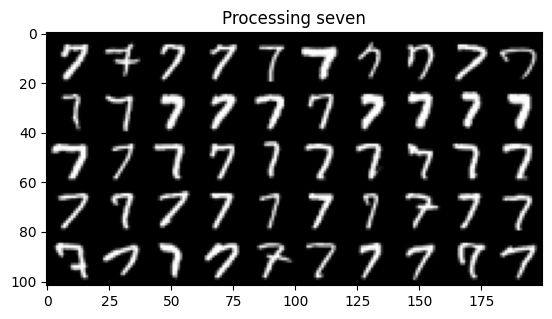

Number of contours found: 50
Processed label 5 with 300 samples.
Found file: eight.png


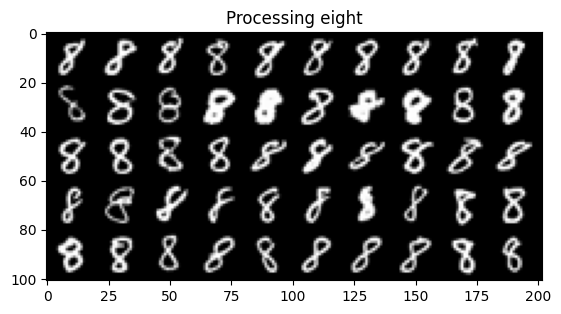

Number of contours found: 50
Processed label 6 with 350 samples.
Found file: nine.png


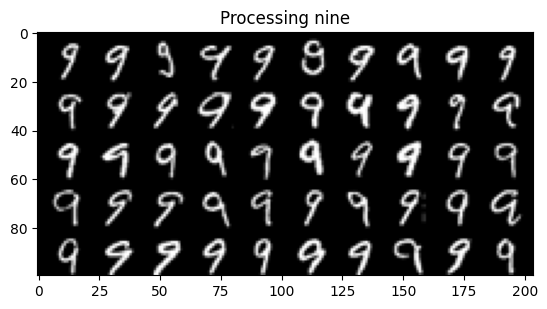

Number of contours found: 50
Processed label 7 with 400 samples.
Model saved to OCR_Log_reg.sav


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import os
import cv2
import numpy as np
import joblib
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Initialize logistic regression model and variables
i = 0
lr = LogisticRegression(max_iter=10000)
train = []
kernel = np.ones((3, 3), np.uint8)

label = []
inp = 0

# Function to process images
def im_process(img, inp):
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
    img1 = cv2.dilate(img1, kernel, iterations=1)
    img2 = img1.copy()
    contours, _ = cv2.findContours(img2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    print(f"Number of contours found: {len(contours)}")

    for cnt in contours:
        (x, y, w, h) = cv2.boundingRect(cnt)
        img3 = img1[y:y+h, x:x+w]
        img4 = cv2.resize(img3, (20, 20))
        img5 = img4.reshape(-1, 400)
        train.append(img5)
        label.append(inp)

    print(f"Processed label {inp} with {len(train)} samples.")
    return None

# Loop through digit images and preprocess
images =  ['one','three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

for image in images:
    filep = os.path.join('', f'{image}.png')

    # Check if the file exists
    if os.path.exists(filep):
        print(f"Found file: {filep}")
    else:
        print(f"File not found: {filep}")
        continue

    img = cv2.imread(filep)

    # Display the image using matplotlib (for Colab compatibility)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Processing {image}")
    plt.show()

    # Process the image for training
    im_process(img, inp)

    inp += 1

# Check if 'train' and 'label' lists are populated before reshaping
if len(train) == 0 or len(label) == 0:
    print("Error: No training data or labels found!")
else:
    # Prepare training data and labels
    tr = np.array(train).reshape(len(train), 400)
    label = np.array(label).reshape(len(label), -1)

    # Train the logistic regression model
    lr.fit(tr, label)

    # Save the trained model
    filename = 'OCR_Log_reg.sav'
    joblib.dump(lr, filename)

    print(f"Model saved to {filename}")


In [ ]:
import os
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Load the pre-trained Logistic Regression model
filename = 'OCR_Log_reg.sav'
lr = joblib.load(filename)

# Kernel for dilation operation
kernel = np.ones((3, 3), np.uint8)

# Function to process images (same as in training)
def im_process(img):
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
    img1 = cv2.dilate(img1, kernel, iterations=1)
    img2 = img1.copy()
    contours, _ = cv2.findContours(img2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    print(f"Number of contours found: {len(contours)}")

    # Prepare a list for storing processed image data
    processed_images = []

    for cnt in contours:
        (x, y, w, h) = cv2.boundingRect(cnt)
        img3 = img1[y:y+h, x:x+w]
        img4 = cv2.resize(img3, (20, 20))
        img5 = img4.reshape(-1, 400)
        processed_images.append(img5)

    print(f"Processed {len(processed_images)} images for prediction.")

    return processed_images

# Function to load all test images from a folder
def load_test_images(test_folder):
    test_images = []

    # Loop through all files in the folder
    for filename in os.listdir(test_folder):
        # Check if the file is an image (by extension, e.g., .png, .jpg)
        if filename.endswith(('.png','.sav')):
            image_path = os.path.join(test_folder, filename)
            img = cv2.imread(image_path)

            # Process the image for prediction
            processed_images = im_process(img)

            # Append processed images for this file
            test_images.extend(processed_images)  # Add all processed images to the list

    return test_images

# Path to the folder containing test images (update as needed)
test_folder = '/content/test_folder'

# Load all test images from the folder
test_images = load_test_images(test_folder)

# Predict the digits for each image in the test list
for i, img5 in enumerate(test_images):
    prediction = lr.predict(img5)
    print(f"Predicted digit for image {i+1}: {prediction[0]}")





FileNotFoundError: [Errno 2] No such file or directory: '/content/test_folder'

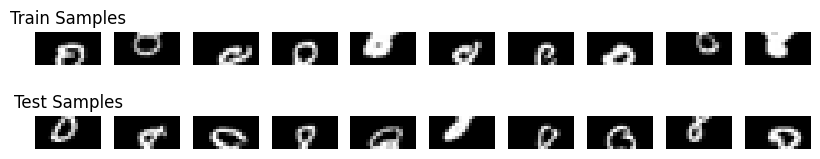

('/content/train_digits.png', '/content/test_digits.png')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = "/content/eight.png"
img = Image.open(image_path).convert("L")  # Convert to grayscale

# Convert to numpy array
img_array = np.array(img)

# Define grid size (assuming 10x10 grid based on the image appearance)
num_rows, num_cols = 10, 10  # Adjust if necessary
cell_height = img_array.shape[0] // num_rows
cell_width = img_array.shape[1] // num_cols

# Extract individual digit images
digits = []
for i in range(num_rows):
    for j in range(num_cols):
        digit = img_array[i * cell_height:(i + 1) * cell_height, j * cell_width:(j + 1) * cell_width]
        digits.append(digit)

# Convert to numpy array
digits = np.array(digits)

# Shuffle the dataset before splitting
np.random.shuffle(digits)

# Split into 80% training and 20% testing
split_idx = int(0.8 * len(digits))
train_digits = digits[:split_idx]
test_digits = digits[split_idx:]

# Display a few samples from training and testing sets
fig, axes = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    axes[0, i].imshow(train_digits[i], cmap='gray')
    axes[0, i].axis("off")
    axes[1, i].imshow(test_digits[i], cmap='gray')
    axes[1, i].axis("off")

axes[0, 0].set_title("Train Samples")
axes[1, 0].set_title("Test Samples")
plt.show()

# Save the train and test sets
train_path = "/content/train_digits.png"
test_path = "/content/test_digits.png"
np.save(train_path, train_digits)
np.save(test_path, test_digits)

train_path, test_path

In [ ]:
pip install tensorflow


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load datasets
train_digits = np.load("train_digits.npy")
test_digits = np.load("test_digits.npy")

# Normalize pixel values
train_digits = train_digits / 255.0
test_digits = test_digits / 255.0

# Flatten images
train_flattened = train_digits.reshape(train_digits.shape[0], -1)
test_flattened = test_digits.reshape(test_digits.shape[0], -1)

# Define ANN model
ann_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(train_flattened.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Generate dummy labels (since real labels aren't available)
train_labels = np.arange(len(train_flattened)) % 10
test_labels = np.arange(len(test_flattened)) % 10

# Train the model
ann_model.fit(train_flattened, train_labels, epochs=10, batch_size=16, validation_data=(test_flattened, test_labels))

# Evaluate the model
test_loss, test_acc = ann_model.evaluate(test_flattened, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")
train_path = "/content/train_ann_model.h5"
np.save("trained_ann_model.h5", ann_model)



Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.0589 - loss: 2.3342 - val_accuracy: 0.0500 - val_loss: 2.3582
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2941 - loss: 2.2324 - val_accuracy: 0.0500 - val_loss: 2.3581
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3458 - loss: 2.1701 - val_accuracy: 0.0500 - val_loss: 2.3640
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4634 - loss: 2.1022 - val_accuracy: 0.0500 - val_loss: 2.3712
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4764 - loss: 2.0644 - val_accuracy: 0.0500 - val_loss: 2.3771
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4955 - loss: 2.0164 - val_accuracy: 0.0500 - val_loss: 2.3939
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5677 - loss: 1.9519 - val_accuracy: 0.0500 - val_loss: 2.4115
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6556 - loss: 1.9038 - val_accuracy: 0.1000 - val_loss: 2.4280


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.0500 - loss: 2.4832
Test Accuracy: 0.0500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


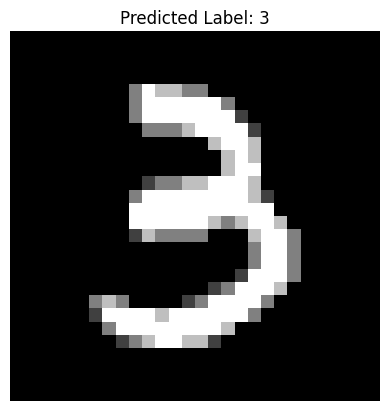

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load the trained model (if saved)
ann_model = keras.models.load_model("trained_ann_model.h5")  # Load your saved model

# Load test dataset
test_digits = np.load("test_digits.npy")
test_digits = test_digits / 255.0  # Normalize
test_flattened = test_digits.reshape(test_digits.shape[0], -1)

# Generate dummy test labels (since real labels are unknown)
test_labels = np.arange(len(test_flattened)) % 10

# Evaluate the model
test_loss, test_acc = ann_model.evaluate(test_flattened, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

def predict_image(index):
    image = x_test[index].reshape(1, 784)  # Reshape to original format
    prediction = np.argmax(model.predict(image))  # Get predicted label
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {prediction}")
    plt.axis('off')
    plt.show()

# Test with a random image
predict_image(1)



In [ ]:
import os
print(os.path.exists("trained_ann_model.h5"))  # Should return True if the file exists


True


In [ ]:
import h5py

try:
    with h5py.File("trained_ann_model.h5", "r") as f:
        print("Valid HDF5 file")
except Exception as e:
    print("Not a valid HDF5 file:", e)


Not a valid HDF5 file: Unable to synchronously open file (file signature not found)


In [ ]:
ann_model.save("trained_ann_model.h5")  # Ensure correct extension


In [ ]:
ann_model = keras.models.load_model("trained_ann_model.h5")


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load the trained model (if saved)
ann_model = keras.models.load_model("trained_ann_model.h5")  # Load your saved model

# Load test dataset
test_digits = np.load("test_digits.npy")
test_digits = test_digits / 255.0  # Normalize
test_flattened = test_digits.reshape(test_digits.shape[0], -1)

# Generate dummy test labels (since real labels are unknown)
test_labels = np.arange(len(test_flattened)) % 10

# Evaluate the model
test_loss, test_acc = ann_model.evaluate(test_flattened, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.0500 - loss: 2.4832
Test Accuracy: 0.0500


In [ ]:
train_labels = np.arange(len(train_flattened)) % 10
test_labels = np.arange(len(test_flattened)) % 10


In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
print("Eager execution enabled:", tf.executing_eagerly())


Eager execution enabled: True


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset (contains handwritten digits 0-9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten 28x28 images into 1D vectors of 784 elements
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build the ANN model
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(784,)),  # Explicitly define input layer
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

'''model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])'''

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Function to predict and display results
def predict_image(index):
    image = x_test[index].reshape(1, 784)  # Reshape to original format
    prediction = np.argmax(model.predict(image))  # Get predicted label
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {prediction}")
    plt.axis('off')
    plt.show()

# Test with a random image
predict_image(2000)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-81087032dc2b>", line 1, in <cell line: 0>
    import tensorflow as tf
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/__init__.py", line 467, in <module>
    importlib.import_module("keras.src.optimizers")
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/__init__.py", line 2, in <module>
    from keras.api import DTypePolicy
  File "/usr/local/lib/python3.11/dist-packages/keras/api/__init__.py", line 8, in <module>
    from keras.api import activations
  File "/usr/local/lib/python3.11/dist-packages/keras/api/activations/__init__.py", line 7, in <modu

TypeError: object of type 'NoneType' has no len()

In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np

# Load the MNIST dataset
(x, y), _ = keras.datasets.mnist.load_data()

# Normalize pixel values to range [0,1]
x = x / 255.0

# Flatten images (28x28 → 784)
x = x.reshape(-1, 784)

# One-hot encode labels
y = keras.utils.to_categorical(y, 10)

# Split dataset: 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8597 - loss: 0.4834 - val_accuracy: 0.9541 - val_loss: 0.1479
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9630 - loss: 0.1238 - val_accuracy: 0.9667 - val_loss: 0.1095
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9759 - loss: 0.0798 - val_accuracy: 0.9677 - val_loss: 0.1038
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9835 - loss: 0.0545 - val_accuracy: 0.9711 - val_loss: 0.0958
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9874 - loss: 0.0408 - val_accuracy: 0.9754 - val_loss: 0.0822
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9757 - loss: 0.0792
Test Accuracy: 0.9754


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


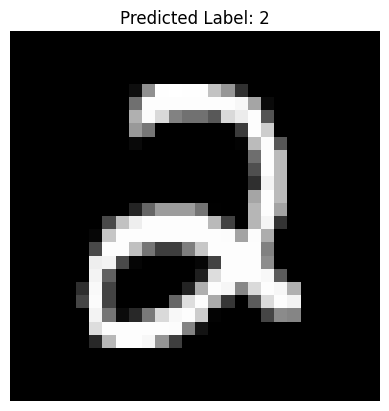

In [3]:
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

def predict_image(index):
    image = x_test[index].reshape(1, 784)  # Reshape to original format
    prediction = np.argmax(model.predict(image))  # Get predicted label
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {prediction}")
    plt.axis('off')
    plt.show()

# Test with a random image
predict_image(1565)


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
letter_recognition = fetch_ucirepo(id=59)

# data (as pandas dataframes)
X = letter_recognition.data.features
y = letter_recognition.data.targets

# metadata
print(letter_recognition.metadata)

# variable information
print(letter_recognition.variables)


{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

In [7]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np

# Load the MNIST dataset
(x, y), _ = keras.datasets.mnist.load_data()

# Normalize pixel values to range [0,1]
x = x / 255.0

# Flatten images (28x28 → 784)
x = x.reshape(-1, 784)

# One-hot encode labels
y = keras.utils.to_categorical(y, 10)

# Split dataset: 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build the ANN model
adaline_model = Sequential([
    Input(shape=(16,)),  # 16 input features
    Dense(26, activation='linear')  # Linear activation for ADALINE
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9882 - loss: 0.0370 - val_accuracy: 0.9731 - val_loss: 0.1023
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9896 - loss: 0.0316 - val_accuracy: 0.9746 - val_loss: 0.0971
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9934 - loss: 0.0201 - val_accuracy: 0.9753 - val_loss: 0.0992
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9927 - loss: 0.0224 - val_accuracy: 0.9782 - val_loss: 0.0900
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9950 - loss: 0.0154 - val_accuracy: 0.9777 - val_loss: 0.0916
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9773 - loss: 0.0903
Test Accuracy: 0.9777


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


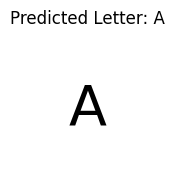

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Define the labels (A-Z)
labels = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
                   'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

# Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(labels)  # Fit with actual letter labels

def predict_image(index):
    image = x_test[index].reshape(1, -1)  # Reshape to match model input
    prediction = np.argmax(model.predict(image))  # Get predicted label index
    predicted_letter = label_encoder.inverse_transform([prediction])[0]  # Convert back to letter

    plt.figure(figsize=(2, 2))
    plt.text(0.5, 0.5, predicted_letter, fontsize=40, ha='center', va='center')
    plt.title(f"Predicted Letter: {predicted_letter}")
    plt.axis('off')
    plt.show()

# Test with a random sample
predict_image(1870)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
column_names = ['letter'] + [f'feature_{i}' for i in range(1, 17)]
data = pd.read_csv(url, header=None, names=column_names)

# Separate features and labels
X = data.iloc[:, 1:].values  # Features
y = data.iloc[:, 0].values   # Labels

# Normalize features to range [0, 1]
X = X / 15.0  # Features are integers in the range 0-15

# Encode labels (letters) to integers
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y)  # A=0, B=1, ..., Z=25

# One-hot encode the integer labels
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_int.reshape(-1, 1))

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Input(shape=(16,)),  # 16 features
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(26, activation='softmax')  # 26 output classes (A-Z)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=45, batch_size=32, validation_data=(X_test, y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/45
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2377 - loss: 2.7926 - val_accuracy: 0.5525 - val_loss: 1.5676
Epoch 2/45
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5955 - loss: 1.4640 - val_accuracy: 0.6503 - val_loss: 1.2569
Epoch 3/45
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6631 - loss: 1.2133 - val_accuracy: 0.7057 - val_loss: 1.1080
Epoch 4/45
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6977 - loss: 1.0972 - val_accuracy: 0.7272 - val_loss: 1.0079
Epoch 5/45
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7204 - loss: 1.0049 - val_accuracy: 0.7425 - val_loss: 0.9373
Epoch 6/45
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7414 - loss: 0.9396 - val_accuracy: 0.7715 - val_loss: 0.8751
Epoch 7/45
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7439 - loss: 0.9050 - val_accuracy: 0.7620 - val_loss: 0.8480
Epoch 8/45
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7620 - loss: 0.8311 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


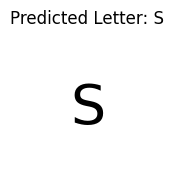

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def predict_image(index):
    image = X_test[index].reshape(1, -1)  # Reshape to match the feature format
    prediction = np.argmax(model.predict(image))  # Get predicted label
    predicted_letter = label_encoder.inverse_transform([prediction])[0]  # Convert back to letter

    plt.figure(figsize=(2, 2))
    plt.text(0.5, 0.5, predicted_letter, fontsize=40, ha='center', va='center')
    plt.title(f"Predicted Letter: {predicted_letter}")
    plt.axis('off')
    plt.show()

# Test with a random sample
predict_image(625)
